<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.1-Предобработка-данных" data-toc-modified-id="1.1-Предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1.1 Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#проверим-на-дубликаты:" data-toc-modified-id="проверим-на-дубликаты:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>проверим на дубликаты:</a></span></li><li><span><a href="#Обработка-пропущенных-значений" data-toc-modified-id="Обработка-пропущенных-значений-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обработка пропущенных значений</a></span></li><li><span><a href="#power---мощность-(л.-с.)" data-toc-modified-id="power---мощность-(л.-с.)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>power - мощность (л. с.)</a></span></li><li><span><a href="#repaired---была-машина-в-ремонте-или-нет" data-toc-modified-id="repaired---была-машина-в-ремонте-или-нет-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>repaired - была машина в ремонте или нет</a></span></li><li><span><a href="#price-—-цена-в-евро" data-toc-modified-id="price-—-цена-в-евро-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>price — цена в евро</a></span></li><li><span><a href="#Подитог:" data-toc-modified-id="Подитог:-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Подитог:</a></span></li></ul></li><li><span><a href="#Разделим-и-закодируем-выборки" data-toc-modified-id="Разделим-и-закодируем-выборки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Разделим и закодируем выборки</a></span><ul class="toc-item"><li><span><a href="#Вернемся-к-значениям-до-стандартизации-и-кодировки-и-применим-только-кодирвоание" data-toc-modified-id="Вернемся-к-значениям-до-стандартизации-и-кодировки-и-применим-только-кодирвоание-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вернемся к значениям до стандартизации и кодировки и применим только кодирвоание</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#Гридсерч-и-кет-буст!" data-toc-modified-id="Гридсерч-и-кет-буст!-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Гридсерч и кет буст!</a></span></li></ul></li><li><span><a href="#2.4-Регрессия-LGBMRegressor" data-toc-modified-id="2.4-Регрессия-LGBMRegressor-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>2.4 Регрессия LGBMRegressor</a></span><ul class="toc-item"><li><span><a href="#Проведены-измерения:" data-toc-modified-id="Проведены-измерения:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Проведены измерения:</a></span></li><li><span><a href="#ВЫВОД" data-toc-modified-id="ВЫВОД-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>ВЫВОД</a></span></li></ul></li></ul></div>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости.

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

В представленных нам данных такие признаки:

-	DateCrawled — дата скачивания анкеты из базы
-	VehicleType — тип автомобильного кузова
-	RegistrationYear — год регистрации автомобиля
-	Gearbox — тип коробки передач
-	Power — мощность (л. с.)
-	Model — модель автомобиля
-	Kilometer — пробег (км)
-	RegistrationMonth — месяц регистрации автомобиля
-	FuelType — тип топлива
-	Brand — марка автомобиля
-	Repaired — была машина в ремонте или нет
-	DateCreated — дата создания анкеты
-	NumberOfPictures — количество фотографий автомобиля
-	PostalCode — почтовый индекс владельца анкеты (пользователя)
-	LastSeen — дата последней активности пользователя

Целевой признак
- Price — цена (евро)


**Для решения задачи разделим ее на несколько частей:**

# 1  Подготовка данных

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
!pip install colorama
!pip install catboost
!pip install lightgbm
from catboost import CatBoostRegressor, Pool
from lightgbm import LGBMRegressor
import lightgbm as lgb

import warnings
warnings.filterwarnings("ignore")

In [2]:
try:
    df = pd.read_csv('/datasets/autos.csv')
except:
    df = pd.read_csv('autos.csv')
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

Как можно заметить в столбцах присутствуют пропуски, конкретно обратим внимание на следующие столбцы:
- VehicleType (тип автомобильного кузова)
- Gearbox (тип коробки передач)
- Model (Модель)
- FuelType (тип топлива)
- Repaired (была машина в ремонте или нет)

## 1.1 Предобработка данных 

In [3]:
#сохраним изначальное количество строк в датафрейме
df_shape_start = df.shape[0]

### проверим на дубликаты:

In [4]:
df[df.duplicated ()]

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
171088,2016-03-08 18:42:48,1799,coupe,1999,auto,193,clk,20000,7,petrol,mercedes_benz,no,2016-03-08 00:00:00,0,89518,2016-03-09 09:46:57
231258,2016-03-28 00:56:10,1000,small,2002,manual,83,other,150000,1,petrol,suzuki,no,2016-03-28 00:00:00,0,66589,2016-03-28 08:46:21
258109,2016-04-03 09:01:15,4699,coupe,2003,auto,218,clk,125000,6,petrol,mercedes_benz,yes,2016-04-03 00:00:00,0,75196,2016-04-07 09:44:54
325651,2016-03-18 18:46:15,1999,wagon,2001,manual,131,passat,150000,7,gasoline,volkswagen,no,2016-03-18 00:00:00,0,36391,2016-03-18 18:46:15


In [5]:
df.drop_duplicates(inplace=True)

print(f'теперь дубликатов: {df.duplicated().sum()}')

теперь дубликатов: 0


Посмотрим на общую картину построив графики:

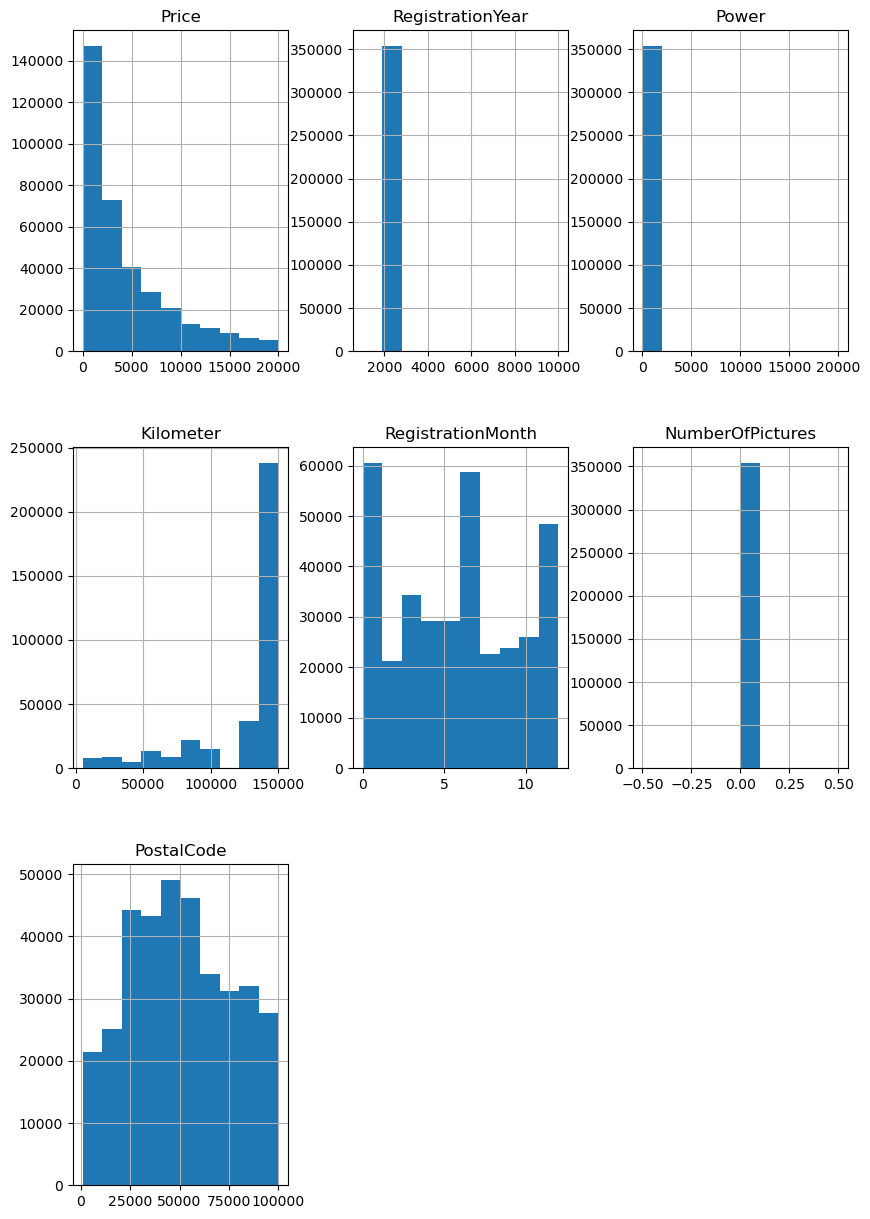

In [6]:
df.hist(figsize=(10, 15));

Предварительно видим такую картинку:

1. В датасете 16 признаков и 354369 объектов 

1.1 Из 16 признаков сразу можно удалять следующие, так как на мой взгляд они не оказывают никакого влияния на стоимость:

DateCrawled — дата скачивания анкеты из базы (дата скачивания анкеты из базы также ничего общего с датой размещения анкеты не имеет - удаляем)

RegistrationMonth — месяц регистрации автомобиля (никогда месяц не указывается в данных и не является фактором оказывающим влияния на цену, только год - удаляем)


2. 7 признаков типа int и 9 типа object 
 важно понять, правильный ли тип данных у признаков, а то может кто-то из типа int окажется типом object или наоборот
3. Были явные дубликаты, 4 шт.  - их удалили

4. Пропуски определили в следующих столбцах:

- VehicleType (тип автомобильного кузова)
- Gearbox (тип коробки передач)
- Model (Модель)
- FuelType (тип топлива)
- Repaired (была машина в ремонте или нет)



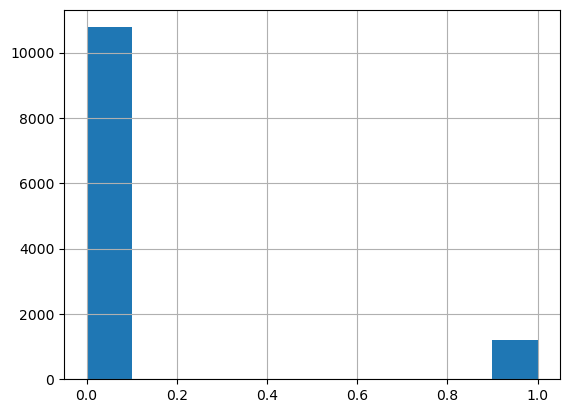

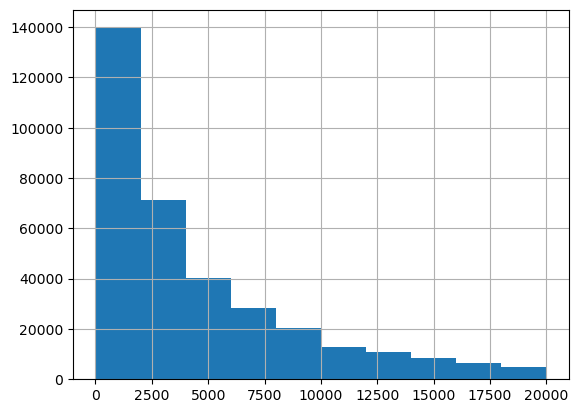

In [7]:
df['Price'].hist(range=(0,1))
plt.show()
df['Price'].hist(range=(1,20001));

**Подитог по гистограмме признака стоимости, Price:**

Как можем заметить - цена указана в тыс. руб, и также есть аномальные значения в виде 0.

Изучим, какие уникальные данные есть в каждом столбце.

In [8]:
def show_rows(data):
    for column in data.columns:
        print('Уникальные значения столбца', column)
        print(data[column].unique())

In [9]:
show_rows(df)

Уникальные значения столбца DateCrawled
['2016-03-24 11:52:17' '2016-03-24 10:58:45' '2016-03-14 12:52:21' ...
 '2016-03-21 09:50:58' '2016-03-14 17:48:27' '2016-03-19 18:57:12']
Уникальные значения столбца Price
[  480 18300  9800 ... 12395 18429 10985]
Уникальные значения столбца VehicleType
[nan 'coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon' 'other']
Уникальные значения столбца RegistrationYear
[1993 2011 2004 2001 2008 1995 1980 2014 1998 2005 1910 2016 2007 2009
 2002 2018 1997 1990 2017 1981 2003 1994 1991 1984 2006 1999 2012 2010
 2000 1992 2013 1996 1985 1989 2015 1982 1976 1983 1973 1111 1969 1971
 1987 1986 1988 1970 1965 1945 1925 1974 1979 1955 1978 1972 1968 1977
 1961 1960 1966 1975 1963 1964 5000 1954 1958 1967 1959 9999 1956 3200
 1000 1941 8888 1500 2200 4100 1962 1929 1957 1940 3000 2066 1949 2019
 1937 1951 1800 1953 1234 8000 5300 9000 2900 6000 5900 5911 1933 1400
 1950 4000 1948 1952 1200 8500 1932 1255 3700 3800 4800 1942 7000 1935
 1936 6500 1923 2290

Изучим те признаки которые кажутся наиболее интересными и актуальными для анализа, посчитаем количество уникальных значений в признаке с помощью команды value_counts:

In [10]:
def show_value(data):
    for column in data.columns:
        print(data[column].value_counts())
        print('Заполненные поля для',column, 'в %:', round(data[column].value_counts().sum()/df.shape[0]*100))
        print('---------------------\
        ----------------------')

In [11]:
show_value(df)

2016-03-24 14:49:47    7
2016-03-19 21:49:56    6
2016-03-26 22:57:31    6
2016-03-11 15:36:59    5
2016-03-28 10:36:47    5
                      ..
2016-03-13 23:39:11    1
2016-03-20 16:48:06    1
2016-03-22 21:51:04    1
2016-03-11 16:25:36    1
2016-03-19 18:57:12    1
Name: DateCrawled, Length: 271174, dtype: int64
Заполненные поля для DateCrawled в %: 100
---------------------        ----------------------
0        10772
500       5670
1500      5394
1000      4648
1200      4594
         ...  
1368         1
233          1
11080        1
16340        1
10985        1
Name: Price, Length: 3731, dtype: int64
Заполненные поля для Price в %: 100
---------------------        ----------------------
sedan          91457
small          79830
wagon          65165
bus            28775
convertible    20203
coupe          16161
suv            11996
other           3288
Name: VehicleType, dtype: int64
Заполненные поля для VehicleType в %: 89
---------------------        --------------------

**Подитог:** 
В столбце Price присутствуют некорректные значения в виде 0.
В столбце Power присутвует некорректное значение мощности.
В столбце NumberOfPictures - все значения заполнены нулем. 

Определим признаки, важные для модели.

К значимым признакам отнесем следующие столбцы:

- VehicleType. Тип кузова определяет ее возможности и напрямую влияет на стоимость (кроссовер, седан, хэтч). 
- Gearbox. Наличие автоматической коробки передач повышает стоимость машины из-за более комфортной езды, что пользуется спросом.
- Power. Мощность в лоашдиных силах (далее л.с.) напрямую влияют на цену.
- Kilometer. Пробег имеет обратно пропорциональную зависиммость от цены. Чем больше пробег у а/м, тем больше происходит износ и соответсвенно снижается цена на вторичном рынке.
- FuelType. Тип топлива определяет тип двигателя и напрямую влияет на расход.
- Brand. Марка автомобиля, это имидж и история которая стоит за автомобилем и показывает его качество.
- NotRepaired. Битые или не битые машины могут кардинально отличаться в цене.
- RegistrationYear. Год регистрации определяет сколько уже лет машина на ходу. соответвенно, чем больше возраст, тем меньше цена.
- Model. 

Остальные столбцы для модели не требуются, так как не влияют на стоимость.

In [12]:
#Удаляем признаки которые никак не влияют на ход исследования
df = df.drop(['DateCrawled','RegistrationMonth',"PostalCode",'NumberOfPictures','LastSeen'],axis=1)

<div class="alert alert-warning">
<b>Комментарий 👉</b>

Не все ненужные для моделей машинного наблюдения признаки удалены из данных. В наших данных подобных признаков 6 ... 6 столбцов от использования которых модели никакого "бонуса" не получат. Найди всех этих "потеряшек" пожалуйста.
</div>

date_created - дата создания анкеты


In [13]:
def get_date_information(df, col_name):
    """
    функция преобразует столбец датафрейма в формат даты и выводит информацию о нем, 
    включая минимальное и максимальное значение, количество уникальных значений
    """
    
    df[col_name] = pd.to_datetime(df[col_name]).dt.date
    print(f'{Style.BRIGHT}Признак {df[col_name].name}{Style.RESET_ALL}\nминимум: {df[col_name].min()}\n'
          f'максимум: {df[col_name].max()}\nуникальных значений: {df[col_name].nunique()}\n')
    


In [14]:
from colorama import Fore, Style
data_columns = ['DateCreated']
for i in data_columns:
    get_date_information(df, i)

Признак DateCreated
минимум: 2014-03-10
максимум: 2016-04-07
уникальных значений: 109



Отсортируем датафрейм по дате регистрации анкеты:

In [15]:
df = df.sort_values('DateCreated').reset_index(drop=True)
display(df.head(8), df.tail(3))

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired,DateCreated
0,8999,NaN,2005,NaN,0,147,125000,petrol,alfa_romeo,NaN,2014-03-10
1,6000,bus,1995,auto,200,other,150000,petrol,chevrolet,no,2015-03-20
2,10400,bus,1993,NaN,0,ducato,30000,gasoline,fiat,NaN,2015-06-18
3,14250,convertible,2005,manual,163,slk,150000,petrol,mercedes_benz,no,2015-08-07
4,5200,convertible,2006,manual,109,2_reihe,80000,petrol,peugeot,no,2015-08-10
5,600,small,2005,manual,54,polo,150000,petrol,volkswagen,yes,2015-09-04
6,600,small,2005,manual,54,polo,150000,petrol,volkswagen,yes,2015-09-04
7,9500,small,2013,manual,90,corsa,50000,gasoline,opel,no,2015-09-09


,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired,DateCreated
354362,1890,wagon,2000,manual,150,a4,5000,gasoline,audi,no,2016-04-07
354363,15490,convertible,2010,manual,150,c_reihe,125000,gasoline,volvo,no,2016-04-07
354364,850,sedan,1991,manual,100,3er,30000,petrol,bmw,no,2016-04-07


Проверим, с какими годами мы имеем дело:

In [16]:
np.sort(df['RegistrationYear'].unique())

array([1000, 1001, 1039, 1111, 1200, 1234, 1253, 1255, 1300, 1400, 1500,
       1600, 1602, 1688, 1800, 1910, 1915, 1919, 1920, 1923, 1925, 1927,
       1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2066, 2200, 2222, 2290, 2500, 2800, 2900, 3000,
       3200, 3500, 3700, 3800, 4000, 4100, 4500, 4800, 5000, 5300, 5555,
       5600, 5900, 5911, 6000, 6500, 7000, 7100, 7500, 7800, 8000, 8200,
       8455, 8500, 8888, 9000, 9229, 9450, 9996, 99

In [17]:
# переведем названия колонок в нижний регистр и разделим слова знаком "_"
df.columns = df.columns.str.lower()
df = df.rename(columns={'vehicletype':'vehicle_type','registrationyear':'registration_year',\
                        'fueltype':'fuel_type','datecreated':'date_created', \
                        'numberofpictures':'number_of_pictures', 'postalcode':'postal_code',\
                        'lastseen':'last_seen'})


Как можно заметить в признаке год регистрации есть значения не связанные с реальность. 
Посмотрим какая все же основная часть значений данного признака.

In [18]:
df['registration_year'].describe()

count    354365.000000
mean       2004.234481
std          90.228466
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: registration_year, dtype: float64

In [19]:
df_count = df.loc[df['registration_year']>2018]
df_count['registration_year'].count()

130

In [20]:
df_count_2 = df.loc[df['registration_year']<1970]
df_count_2['registration_year'].count()

1338

In [21]:
df = df[(df['registration_year']>1970)]
df = df[(df['registration_year']<2018)]

In [22]:
df.shape

(348605, 11)

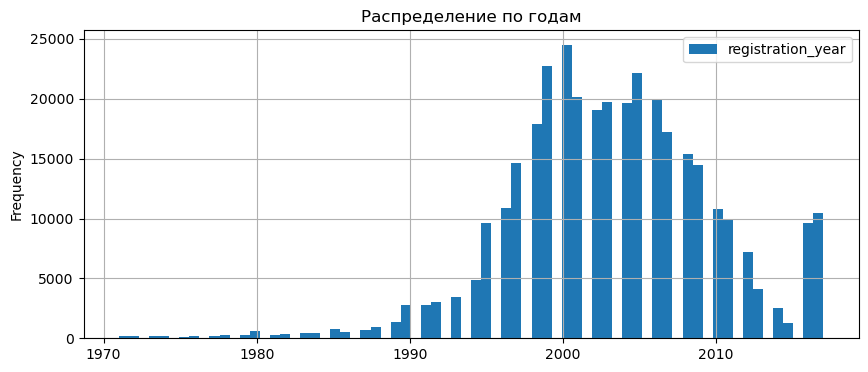

In [23]:
df.plot(kind='hist', title='Распределение по годам', y='registration_year', bins=70, grid=True, figsize=(10,4))
plt.show()

Из графика видно прирост автомобилей начинаются с 1990-го года.Количество объявлений с этого года начинает расти х2 и т д. Далее с 2000х годов по 2008 объявления держутся на пиковых значениях, в диапазоне 20000 -24000. Далее происходит постепенный спад.

Объявлений до 80-х годов довольно мало. Посчитаем их за выбросы и удалим.

Также нам известно то, что крайняя дата среза информации - это 2016-04-07, то есть старше 2016 года автомобили быть не могут. Также посчитаем их за аномалии и удалим.


In [24]:
df = df[(df['registration_year']>1980)]
df = df[(df['registration_year']<2017)]

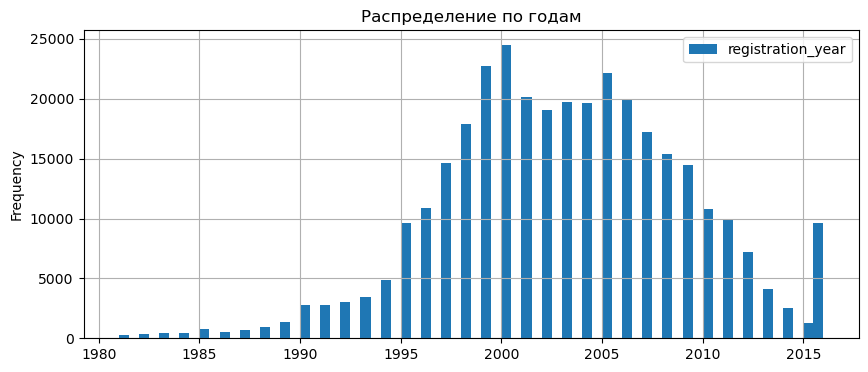

In [25]:
df.plot(kind='hist', title='Распределение по годам', y='registration_year', bins=70, grid=True, figsize=(10,4))
plt.show()

### Обработка пропущенных значений

In [26]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient(axis=0)

,0
price,0.000000
vehicle_type,7.000000
registration_year,0.000000
gearbox,5.000000
power,0.000000
model,5.000000
kilometer,0.000000
fuel_type,8.000000
brand,0.000000
repaired,19.000000


Пропуски по прежнему есть, особенно в признаке repaired	- был автомобиль в ремонте или нет.

Столбцы, требующие обработки:

- VehicleType. 
- Gearbox.
- Power. Скоректируем на основе реальных значений в машинах. Иметь 1 л.с. или 15000 л.с. для машины  нереально.
- FuelType. 
- Repaired. 
- Model.

In [27]:
(
    df.groupby('brand')['model']
    .apply(lambda x: x.notnull().sum())
    .reset_index(name='кол-во значений')
    .sort_values('кол-во значений').head(3)
)

,brand,кол-во значений
33,sonstige_autos,0
16,lada,180
37,trabant,356


In [28]:
#Удалим их, так как мы не знаем про них ни марку ни модель:

df = df[df['brand'] != 'sonstige_autos']

заполним пропуски модой, но для бóльшей точности сгруппируем моду по бренду

In [29]:
def fill_mode(group, column_name):
    """функция заполняет пропуски модой группы"""
    
    if group[column_name].notna().any():
        mode = stats.mode(group[column_name].dropna())[0][0]
        group[column_name].fillna(mode, inplace=True)
    return group

In [30]:
grouped = df.groupby(['brand'])
df = grouped.apply(fill_mode, column_name='model')

Посмотрим, много ли таких предложений, для которых отсутствует информация по всем трём признакам:

In [31]:
df[(df['vehicle_type'].isnull()) & (df['gearbox'].isnull()) & (df['fuel_type'].isnull())].shape[0]


4907

Такие автопредложения слишком малоинформативны и, вариантов заполнить достоверным путем мне не предвидится возможным - удаляем.

In [32]:
df = df[~((df['vehicle_type'].isnull()) & (df['gearbox'].isnull()) & (df['fuel_type'].isnull()))]


Пропуски остались

In [33]:
#Поступим с пропусками в них так же, как ранее поступали с пропусками моделей авто 
#- заполним модой по группировке признаков - brand и model


for col_name in ['vehicle_type', 'gearbox', 'fuel_type']:
    grouped = df.groupby(['brand', 'model'])
    df = grouped.apply(fill_mode, column_name=col_name)
    # один какой-то признак всё же остаётся, снесём его вручную
    if df[df.vehicle_type.isna()].shape[0]:
        df = df[~df.vehicle_type.isnull()]

### power - мощность (л. с.)
Признак имеет слишком сильный разлёт значений. Посмотрим на минимальные и максимальные из них:

In [34]:
df['power'].value_counts().sort_index()

0        29821
1           21
2            8
3            1
4            6
         ...  
17932        1
19208        1
19211        1
19312        1
20000        1
Name: power, Length: 690, dtype: int64

Удалим аномалии

count    297838.000000
mean        120.183237
std          52.115689
min          11.000000
25%          75.000000
50%         110.000000
75%         150.000000
max         400.000000
Name: power, dtype: float64

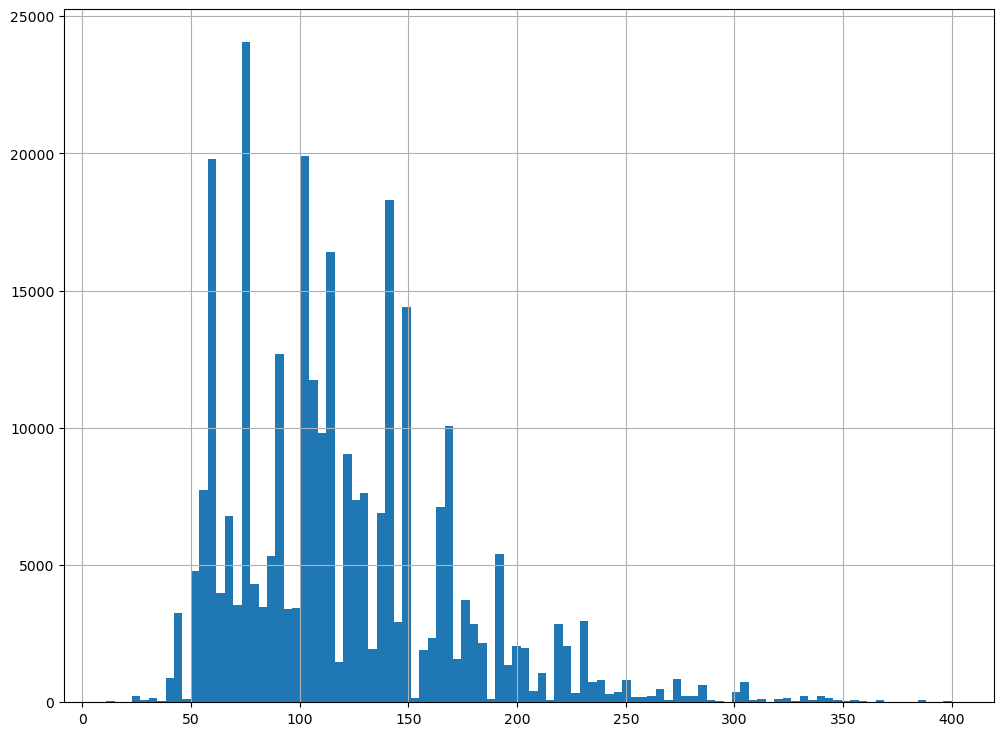

In [35]:
df = df.query('10 < power < 401')
df['power'].hist(bins=100, figsize=(12,9))
df['power'].describe()

<div class="alert alert-warning">
<b>Комментарий 👉</b>

Это тоже верно. Да, низший и высший пороги мощности обсуждаемы, но для целей нашего учебного проекта достаточно того, что ты видишь проблему выбросов и необходимым способом её обрабатываешь.
</div>

In [36]:
df.shape[0]/df_shape_start 

0.8404741949775516

### repaired - была машина в ремонте или нет
Признак с огромным количеством пропусков и всего 2 значениями, посмотрим на него:


In [37]:

print(f"пропусков {df['repaired'].isna().sum()}\nзначения:\n{df['repaired'].value_counts()}")

пропусков 43896
значения:
no     224043
yes     29899
Name: repaired, dtype: int64


признак бинарный. Эти пропуски могли появится по самой простой причине,многие пользователи при заполнении анкет просто не указывают этот параметр, так как он может существенно повлиять на конечную стоимость и скорость продажи автомобиля 
Посмотрим, сколько в % занимают анкеты в пропуском в repaired:


In [38]:
f"{(df['repaired'].isna().sum()  / df.shape[0]):.2%}"

'14.74%'

14.74% - это много для удаления.
Заполнять признак наугад не будем, но заполним его как третье значение - no_info:



In [39]:
df['repaired'].fillna('no_info', inplace=True)

In [40]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient(axis=0)

,0
price,0.000000
vehicle_type,0.000000
registration_year,0.000000
gearbox,0.000000
power,0.000000
model,0.000000
kilometer,0.000000
fuel_type,0.000000
brand,0.000000
repaired,0.000000


### price — цена в евро
Это целевая переменная, её будем предсказывать. Пропусков в ней нет, но как помним были нули

In [41]:
df['price'].value_counts().sort_index().head(20)

0     6127
1      614
2        7
3        4
5        7
9        4
10      21
11       1
12       1
13       2
15       3
16       1
20       6
24       1
25       4
26       1
29       1
30      11
35       3
38       1
Name: price, dtype: int64

Очевидно что ни за 0 ни за 1 и ни за 38 евро автомобиль стоить не может.

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Молодец. Цена == 0 - это без комментариев.
</div>

Проверим, много ли у нас таких объявлений:

In [42]:
print(f"объявлений дешевле 100 евро {df[df['price'] < 100].shape[0]} шт., "
      f"это {df[df['price'] < 100].shape[0]/df.shape[0]:.2%}")

объявлений дешевле 100 евро 7236 шт., это 2.43%


Удалим подобные аномалии

In [43]:
df = df[df['price'] >= 100]

<div class="alert alert-warning">
<b>Комментарий 👉</b>

(Отвлечение ... что-то менять не надо) Мне это напомнило один известный фильм, где автомобиль за 500 долларов был способен доехать до Сан-Франциско и обратно ))))
</div>

И также удаляем год постановки на учёт registration_year, он нам помог с генерацией новых признаков и больше не нужен:

In [44]:

df.drop(columns='registration_year', axis=1, inplace=True)

In [45]:
#Признаки разобрали, порверим теперь, сколько значений у нас осталось после удаления аномалий:

print(df.info())
f'{df.shape[0] / df_shape_start:.2%}'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290602 entries, 1 to 354364
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         290602 non-null  int64 
 1   vehicle_type  290602 non-null  object
 2   gearbox       290602 non-null  object
 3   power         290602 non-null  int64 
 4   model         290602 non-null  object
 5   kilometer     290602 non-null  int64 
 6   fuel_type     290602 non-null  object
 7   brand         290602 non-null  object
 8   repaired      290602 non-null  object
 9   date_created  290602 non-null  object
dtypes: int64(3), object(7)
memory usage: 24.4+ MB
None


'82.01%'

### Подитог:
От изначального размера датафрейма осталось 82%

Данные проанализированы и подготовлены к обучению моделей

# 2  Обучение моделей

## Разделим и закодируем выборки

In [46]:
df.drop(columns='date_created', axis=1, inplace=True)

In [47]:
df = df.reset_index(drop=True)

In [48]:
df.shape

(290602, 9)

In [49]:
df['brand'].value_counts()/290602*100

volkswagen       21.767572
opel             11.006462
bmw              11.006462
mercedes_benz     9.234623
audi              8.729465
ford              7.007178
renault           4.753236
peugeot           3.216771
fiat              2.568805
seat              2.003083
skoda             1.696134
mazda             1.618709
smart             1.537498
citroen           1.439770
nissan            1.382647
toyota            1.375421
hyundai           1.067095
mini              1.014790
volvo             0.952850
mitsubishi        0.853057
honda             0.807290
kia               0.716788
suzuki            0.669989
alfa_romeo        0.660697
chevrolet         0.474532
chrysler          0.391601
dacia             0.275291
subaru            0.219200
daihatsu          0.209565
jeep              0.189262
porsche           0.186853
saab              0.161045
land_rover        0.153475
jaguar            0.143495
daewoo            0.140054
lancia            0.125257
rover             0.123881
t

In [50]:
df['brand'].value_counts().count()

39

Все что встречается реже 0,95% поместим в новый столбец и дадим наименование "other"

In [51]:
df['new_brand'] = ''
for i in range(len(df)):
    if df['brand'][i] == 'volkswagen':
        df.loc[i, 'new_brand'] = 'volkswagen'
    elif df['brand'][i] == 'opel':
        df.loc[i, 'new_brand'] = 'opel'
    elif df['brand'][i] == 'bmw':
        df.loc[i, 'new_brand'] = 'bmw'
    elif df['brand'][i] == 'mercedes_benz':
        df.loc[i, 'new_brand'] = 'mercedes_benz'
    elif df['brand'][i] == 'audi':
        df.loc[i, 'new_brand'] = 'audi'
    elif df['brand'][i] == 'ford':
        df.loc[i, 'new_brand'] = 'ford'
    elif df['brand'][i] == 'renault':
        df.loc[i, 'new_brand'] = 'renault'
    elif df['brand'][i] == 'peugeot':
        df.loc[i, 'new_brand'] = 'peugeot'
    elif df['brand'][i] == 'fiat':
        df.loc[i, 'new_brand'] = 'fiat'
    elif df['brand'][i] == 'seat':
        df.loc[i, 'new_brand'] = 'seat'
    elif df['brand'][i] == 'skoda':
        df.loc[i, 'new_brand'] = 'skoda'
    elif df['brand'][i] == 'mazda':
        df.loc[i, 'new_brand'] = 'mazda'
    elif df['brand'][i] == 'smart':
        df.loc[i, 'new_brand'] = 'smart'
    elif df['brand'][i] == 'citroen':
        df.loc[i, 'new_brand'] = 'citroen'
    elif df['brand'][i] == 'toyota':
        df.loc[i, 'new_brand'] = 'toyota'    
    elif df['brand'][i] == 'hyundai':
        df.loc[i, 'new_brand'] = 'hyundai'
    elif df['brand'][i] == 'mini':
        df.loc[i, 'new_brand'] = 'mini'
    elif df['brand'][i] == 'volvo':
        df.loc[i, 'new_brand'] = 'volvo'
    else:
        df.loc[i, 'new_brand'] = 'other'

In [52]:
df['brand'].value_counts().count()/df['new_brand'].value_counts().count()

2.0526315789473686

**Результат:** Более чем в 2 раза сократили количество марок

In [53]:
df['new_brand'].value_counts()

volkswagen       63257
bmw              31985
opel             31985
mercedes_benz    26836
audi             25368
other            23260
ford             20363
renault          13813
peugeot           9348
fiat              7465
seat              5821
skoda             4929
mazda             4704
smart             4468
citroen           4184
toyota            3997
hyundai           3101
mini              2949
volvo             2769
Name: new_brand, dtype: int64

Тоже самое проделаем с столбцом(признаком) model

In [54]:
pd.set_option('display.max_rows', None)

In [55]:
df['model'].value_counts(ascending=True)/290602*100


serie_2               0.000344
rangerover            0.000688
range_rover_evoque    0.000688
kalina                0.001721
samara                0.001721
i3                    0.001721
elefantino            0.002065
gl                    0.004129
amarok                0.004129
kappa                 0.004473
q3                    0.004473
200                   0.005506
materia               0.005850
charade               0.006882
musa                  0.007226
9000                  0.007915
b_max                 0.008603
delta                 0.009291
lodgy                 0.010323
terios                0.011012
145                   0.011700
move                  0.012044
croma                 0.012732
lybra                 0.013420
v60                   0.013420
911                   0.013765
nubira                0.017550
range_rover_sport     0.017894
crossfire             0.019614
glk                   0.020303
cx_reihe              0.020647
defender              0.021335
lanos   

Все что встречается реже 0,95% поместим в новый столбец и дадим наименование "other_model"

In [56]:
df['new_model'] = ''
for i in range(len(df)):
    if df['model'][i] == 'golf':
        df.loc[i, 'new_model'] = 'golf'
    elif df['model'][i] == 'other':
        df.loc[i, 'new_model'] = 'other'
    elif df['model'][i] == '3er':
        df.loc[i, 'new_model'] = '3er'
    elif df['model'][i] == 'corsa':
        df.loc[i, 'new_model'] = 'corsa'
    elif df['model'][i] == 'polo':
        df.loc[i, 'new_model'] = 'polo'
    elif df['model'][i] == 'a4':
        df.loc[i, 'new_model'] = 'a4'
    elif df['model'][i] == 'astra':
        df.loc[i, 'new_model'] = 'astra'
    elif df['model'][i] == 'passat':
        df.loc[i, 'new_model'] = 'passat'
    elif df['model'][i] == 'c_klasse':
        df.loc[i, 'new_model'] = 'c_klasse'
    elif df['model'][i] == '5er':
        df.loc[i, 'new_model'] = '5er'
    elif df['model'][i] == 'e_klasse':
        df.loc[i, 'new_model'] = 'e_klasse'
    elif df['model'][i] == 'focus':
        df.loc[i, 'new_model'] = 'focus'
    elif df['model'][i] == 'a3':
        df.loc[i, 'new_model'] = 'a3'
    elif df['model'][i] == 'a6':
        df.loc[i, 'new_model'] = 'a6'
    elif df['model'][i] == '2_reihe':
        df.loc[i, 'new_model'] = '2_reihe'   
    elif df['model'][i] == 'fiesta':
        df.loc[i, 'new_model'] = 'fiesta'
    elif df['model'][i] == 'twingo':
        df.loc[i, 'new_model'] = 'twingo'
    elif df['model'][i] == 'transporter':
        df.loc[i, 'new_model'] = 'transporter'
    elif df['model'][i] == 'fortwo':
        df.loc[i, 'new_model'] = 'fortwo'
    elif df['model'][i] == 'a_klasse':
        df.loc[i, 'new_model'] = 'a_klasse'
    elif df['model'][i] == 'vectra':
        df.loc[i, 'new_model'] = 'vectra'
    elif df['model'][i] == '1er':
        df.loc[i, 'new_model'] = '1er'
    elif df['model'][i] == 'mondeo':
        df.loc[i, 'new_model'] = 'mondeo'
    elif df['model'][i] == '3_reihe':
        df.loc[i, 'new_model'] = '3_reihe'
    elif df['model'][i] == 'touran':
        df.loc[i, 'new_model'] = 'touran'
    elif df['model'][i] == 'punto':
        df.loc[i, 'new_model'] = 'punto'
    elif df['model'][i] == 'clio':
        df.loc[i, 'new_model'] = 'clio'
    else:
        df.loc[i, 'new_model'] = 'other_model'

In [57]:
df['model'].value_counts().count()/df['new_model'].value_counts().count()

8.857142857142858

**Результат:** В 8,85 раза сократили количество моделей

In [58]:
df.drop(columns='model', axis=1, inplace=True)
df.drop(columns='brand', axis=1, inplace=True)

In [59]:
features = df.drop('price', axis=1)
target = df['price']


In [60]:
# Определение списка категориальных признаков
cat_columns = ["vehicle_type", "gearbox",'new_brand','new_model',"fuel_type", "repaired"]

# Определение списка числовых признаков
num_columns = ["power", "kilometer"]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(features, target,\
                                           test_size=0.25, random_state=12345)

In [62]:
X_train_standard = X_train.copy()

#кодирование Применяем One Hot Encoding
encoder_ohe = OneHotEncoder(drop ='first', handle_unknown='ignore', sparse=False)

encoder_ohe.fit(X_train_standard[cat_columns])

X_train_standard[encoder_ohe.get_feature_names()] = encoder_ohe.transform(X_train_standard[cat_columns])

X_train_standard = X_train_standard.drop(cat_columns, axis=1) # удаляем старые столбцы которые мы размножили

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Сократил количество столбцов/признаков с 303 до 63. Явно ускорилась модель LGBMRegressor и CatBoost. </font>
</div>

In [63]:
# теперь стандартизация для числовых признаков:

scaler = StandardScaler()
X_train_standard[num_columns] = scaler.fit_transform(X_train_standard[num_columns])


In [64]:
# а вот так по обученным на трейне трансформерам трансформируетмя тестовая выборка
X_test_standard = X_test.copy() # копия икс теста

# преобразовываем категориальные
X_test_standard[encoder_ohe.get_feature_names()] = encoder_ohe.transform(X_test_standard[cat_columns]) 
# удаляем всякое старьё
X_test_standard = X_test_standard.drop(cat_columns, axis=1)
# преобразовывает числовые
X_test_standard[num_columns] = scaler.transform(X_test_standard[num_columns])

### Вернемся к значениям до стандартизации и кодировки и применим только кодирвоание 

In [65]:
# теперь стандартизация для числовых признаков:

features_no_standart = X_train.copy()

encoder_ohe2 = OneHotEncoder(drop ='first', handle_unknown='ignore', sparse=False)

encoder_ohe2.fit(features_no_standart[cat_columns])

features_no_standart[encoder_ohe2.get_feature_names()] = encoder_ohe2.transform(features_no_standart[cat_columns])

X_train_no_standart = features_no_standart.drop(cat_columns, axis=1)

In [66]:
# и для теста:
X_test_no_standart = X_test.copy()

X_test_no_standart[encoder_ohe2.get_feature_names()] = encoder_ohe2.transform(
    X_test_no_standart[cat_columns]
) 
X_test_no_standart = X_test_no_standart.drop(cat_columns, axis=1)

In [67]:
# проверим полученные размера данных
print(f'{X_train_standard.shape=}\n{X_train_no_standart.shape=}\n{y_train.shape=}\n'
      f'{X_test_standard.shape=}\n{X_test_no_standart.shape=}\n{y_test.shape=}')

X_train_standard.shape=(217951, 63)
X_train_no_standart.shape=(217951, 63)
y_train.shape=(217951,)
X_test_standard.shape=(72651, 63)
X_test_no_standart.shape=(72651, 63)
y_test.shape=(72651,)


### Linear Regression

In [68]:
%%time
linear_model = LinearRegression()
scores = cross_val_score(linear_model,
                         X_train_standard,
                         y_train,
                         scoring='neg_mean_squared_error',
                         n_jobs=-1,
                         cv=2)
rmse_scores = np.sqrt(-scores)
RMSE = abs(scores.mean()) ** 0.5 
RMSE

Wall time: 2.49 s


2888.9308278620133

In [69]:
%%time
linear_model.fit(X_train_standard, y_train)

Wall time: 400 ms


LinearRegression()

In [70]:
%%time
preds_linear_model = linear_model.predict(X_test_standard)

Wall time: 49 ms


In [71]:
mse_lmodel = mean_squared_error(y_test, preds_linear_model)
print("RMSE для линейной модели на тестовой выборке:", round((mse_lmodel) ** 0.5, 2))

RMSE для линейной модели на тестовой выборке: 2902.52


### Гридсерч и кет буст!

In [72]:
model = CatBoostRegressor(cat_features=cat_columns, random_state=12345, verbose=False)


param_grid = {
#     'learning_rate': [0.01, 0.05, 0.1],
#     'depth': [4, 6, 8],
#     'l2_leaf_reg': [0.1, 1, 10],
#     'bagging_temperature': [0, 1, 5],
#     'random_strength': [0, 1, 5]
}
grid = GridSearchCV(model, param_grid=param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=-1)

search = grid.fit(X_train, y_train) 

#теперь в search.best_params_ будут лежать лучшие подобранные параметры.
#Можно пересоздать модель с ними, распаковав их через две звёздочки:

model = CatBoostRegressor(**search.best_params_, cat_features=cat_columns, random_state=12345, verbose=False)

In [73]:
%%time
model.fit(X_train, y_train)

Wall time: 1min 13s


In [74]:
%%time
catboost_predict = model.predict(X_test)
catboost_predict

Wall time: 173 ms


array([ 913.49317   , 3458.51824366, 5685.11260088, ..., 2700.27252098,
       9111.29652972, 2346.14882435])

In [75]:
mse_catmodel = mean_squared_error(y_test, catboost_predict)
print("RMSE для CatBoostRegressor модели на тренировочной выборке:", round((mse_catmodel) ** 0.5, 2))

RMSE для CatBoostRegressor модели на тренировочной выборке: 2162.55


_____

## 2.4 Регрессия LGBMRegressor

In [76]:
%%time

lgbmmodel = LGBMRegressor(learning_rate=0.1, 
                      num_leaves=100, 
                      random_state=12345,
                      cat_features=cat_columns)
lgbmmodel.fit(X_train_no_standart, y_train)

[LightGBM] [Warning] Unknown parameter: cat_features
Wall time: 974 ms


LGBMRegressor(cat_features=['vehicle_type', 'gearbox', 'new_brand', 'new_model',
                            'fuel_type', 'repaired'],
              num_leaves=100, random_state=12345)

In [77]:
lgbmmodel_i = LGBMRegressor(learning_rate=0.1, 
                      num_leaves=100, 
                      random_state=12345
                      )


param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [10, 30, 70],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(lgbmmodel_i, param_grid=param_grid, cv=2, scoring='neg_mean_squared_error')

search_i = grid_search.fit(X_train_no_standart, y_train) 

#теперь в search.best_params_ будут лежать лучшие подобранные параметры.
#Можно пересоздать модель с ними, распаковав их через две звёздочки:

lgbmmodel_i = LGBMRegressor(**search_i.best_params_, random_state=12345, verbose=1)

# Вывод результатов
print("Лучшие параметры:", search_i.best_params_)
print("Лучшая оценка:", search_i.best_score_)

Лучшие параметры: {'learning_rate': 1, 'max_depth': 7, 'n_estimators': 70}
Лучшая оценка: -4893718.467914572


In [78]:
%%time
lgbmmodel_i.fit(X_train_no_standart, y_train)

lgbm_predict2 = lgbmmodel_i.predict(X_test_no_standart)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 344
[LightGBM] [Info] Number of data points in the train set: 217951, number of used features: 63
[LightGBM] [Info] Start training from score 4832.677620
Wall time: 702 ms


<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

А здесь 3ю разновидность, только закодированную. А в чем смысл разных выборок (я не про лин. рег - с ней мне всё ясно)?
</div>

In [79]:
mse_lgbmmodel2 = mean_squared_error(y_test, lgbm_predict2)
print("RMSE для LGBMRegressor модели на тестовой выборке:", round((mse_lgbmmodel2) ** 0.5, 2))

RMSE для LGBMRegressor модели на тестовой выборке: 2170.38


In [80]:
%%time

lgbm_predict = lgbmmodel.predict(X_test_no_standart)

Wall time: 164 ms


In [81]:
mse_lgbmmodel = mean_squared_error(y_test, lgbm_predict)
print("RMSE для LGBMRegressor модели на тестовой выборке:", round((mse_lgbmmodel) ** 0.5, 2))

RMSE для LGBMRegressor модели на тестовой выборке: 2164.76


### Проведены измерения:

- времени обучения по всем моделям
- времени предсказания по всем моделям
- качества предсказания по метрике RMSE для всех моделей

Перейдем к анализуи выберем лучшую модель.

# 3  Анализ моделей

In [85]:
df = [["2.49 s", "49 ms",2902.52],
        ["1.13 min ", "173 ms", 2162.55],
        ["857 ms", "164 ms", 2164.76]]
model = ["Linear Regression", "CatBoostRegressor", "LGBMRegressor"]

In [86]:
pd.DataFrame(data=df, index=model, columns=["fit_time", "predict_time", "RMSE"])

,fit_time,predict_time,RMSE
Linear Regression,2.49 s,49 ms,2902.52
CatBoostRegressor,1.13 min,173 ms,2162.55
LGBMRegressor,857 ms,164 ms,2164.76


### ВЫВОД

Определяющими факторами при выборе модели в данной работе являются следующие показатели:

- Время обучения

- Время предсказания

- Качество предсказаний

Качество Linear Regression нам не подходит, не смотря на быструю работу - она составила выше 2500.

LightGBM обучается в разы быстрее и при этом по качество RMSE уступает всего на 0,1%, что незначительно.

Основываясь на этом, лучше всего подойдет модель построенная на LightGBM

	                   fit_time   predict_time	     RMSE
       LGBMRegressor	857 ms	     164 ms	        2164.7